In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string, sys,os
# sys.path += ['../'] 
import pandas as pd

import config
import data
import process
from data import *
%matplotlib inline

## Dataset Exploration

### 1.  Loading data

Finished restore data ...


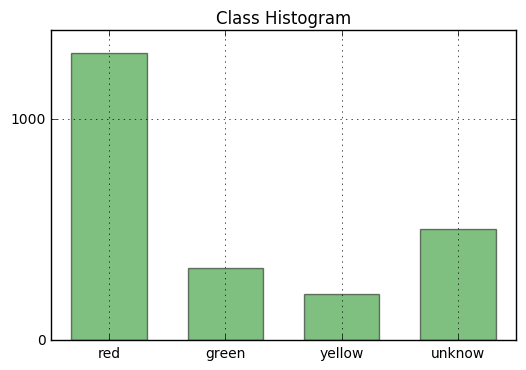

In [2]:
dataset = DataSet()
# dataset.load_data(config.train_data)
# dataset.save()
dataset.restore()
dataset.display_hist_classes()

In [ ]:
image_r =  dataset.data['red'][1]
image_g =  dataset.data['green'][0]
image_y =  dataset.data['yellow'][0]
image_u =  dataset.data['unknow'][0]

images = [image_r,image_g,image_y,image_u] 
labels = ['red','green','yellow','unknow']

plt.rcParams['figure.figsize'] = (12, 6)
process.plot_images(images,labels)
plt.show()

### 2.  Thresholding

In [ ]:
from collections import defaultdict

import cv2 
def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def get_thresholds(image, rgb_threshold):
    
    threshold = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
    return threshold 
    
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#1. Grab the x and y size
height = image_r.shape[0]
width = image_r.shape[1]

#2. Define a kernel size and apply Gaussian smoothing
kernel_size = 3
blur_r = gaussian_blur(np.copy(image_r), kernel_size)
blur_g = gaussian_blur(np.copy(image_g), kernel_size)
blur_y = gaussian_blur(np.copy(image_y), kernel_size)
blur_u = gaussian_blur(np.copy(image_u), kernel_size)

color_select  = defaultdict(list)

# Filter the image to get only red
red_threshold, green_threshold, blue_threshold = 240, 0, 0
rgb_threshold_r = [red_threshold, green_threshold, blue_threshold]

color_select['red'] = blur_r 
thresholds = get_thresholds(color_select['red'], rgb_threshold_r)
color_select['red'][thresholds] = [0,0,0]

# Filter the image to get only green
red_threshold, green_threshold, blue_threshold = 0, 240, 0
rgb_threshold_g = [red_threshold, green_threshold, blue_threshold]

color_select['green'] = blur_g 
thresholds = get_thresholds(color_select['green'], rgb_threshold_g)        
color_select['green'][thresholds] = [0,0,0]

# Filter the image to get only yellow
red_threshold, green_threshold, blue_threshold = 240, 240, 0
rgb_threshold_y = [red_threshold, green_threshold, blue_threshold]

color_select['yellow'] = blur_y 
thresholds = get_thresholds(color_select['yellow'], rgb_threshold_y)        
color_select['yellow'][thresholds] = [0,0,0]

# Filter the image with both red, green and yellow filter
color_select['unknow'] = blur_u 
thresholds_r = get_thresholds(color_select['unknow'], rgb_threshold_r)
thresholds_g = get_thresholds(color_select['unknow'], rgb_threshold_g)
thresholds_y = get_thresholds(color_select['unknow'], rgb_threshold_y)

color_select['unknow'][thresholds_r] = [0,0,0]
color_select['unknow'][thresholds_g] = [0,0,0]
color_select['unknow'][thresholds_y] = [0,0,0]
        
# #3. Convert RGB to HSV
hsv_r = cv2.cvtColor(color_select['red'], cv2.COLOR_RGB2HSV)
hsv_g = cv2.cvtColor(color_select['green'], cv2.COLOR_RGB2HSV)
hsv_y = cv2.cvtColor(color_select['yellow'], cv2.COLOR_RGB2HSV)
hsv_u = cv2.cvtColor(color_select['unknow'], cv2.COLOR_RGB2HSV)

#5. Bitwise-OR the yellow and white images
gray_r = grayscale(color_select['red'])
gray_g = grayscale(color_select['green'])
gray_y = grayscale(color_select['yellow'])
gray_u = grayscale(color_select['unknow'])

plt.rcParams['figure.figsize'] = (12, 6)

images = [image_r,image_g,image_y,image_u] 
labels = ['orig red','orig green','orig yellow', 'orig unknow']
process.plot_images(images,labels)
plt.show()

images = [color_select['red'],color_select['green'],color_select['yellow'],color_select['unknow']] 
labels = ['thld red','thld green','thld yellow','thld unknow', 'bit red','bit green','bit yellow', 'bit unknow']
process.plot_images(images,labels)
plt.show()

images = [gray_r,gray_g,gray_y,gray_u] 
labels = ['bit red','bit green','bit yellow', 'bit unknow']
process.plot_images(images,labels)
plt.show()

### 3.  Distance

In [3]:
path = os.path.abspath('..')+'/output'+'/light8_lane1' 
log = pd.read_csv(path+'/cap_camera.csv')
log.columns = ['timestamp','filename','traffic light','state','distance']
pd.set_option('display.width', 120)
print(log)

               timestamp                               filename  traffic light  state  distance
0    1504538976938906404  camera/unknow/1504538976938906404.jpg              7      4      -1.0
1    1504538977039620740  camera/unknow/1504538977039620740.jpg              7      4      -1.0
2    1504538977139312401  camera/unknow/1504538977139312401.jpg              7      4      -1.0
3    1504538977237137464  camera/unknow/1504538977237137464.jpg              7      4      -1.0
4    1504538977341803711  camera/unknow/1504538977341803711.jpg              7      4      -1.0
5    1504538977441433310  camera/unknow/1504538977441433310.jpg              7      4      -1.0
6    1504538977537017073  camera/unknow/1504538977537017073.jpg              7      4      -1.0
7    1504538977637016984  camera/unknow/1504538977637016984.jpg              7      4      -1.0
8    1504538977743629736  camera/unknow/1504538977743629736.jpg              7      4      -1.0
9    1504538977845549487  camera/unknow/

In [4]:
df = pd.DataFrame(log[log['traffic light'] == 7])
# df = df[ (df['state'] < 4) & (df['distance'] > 190)]
df = df[ (df['state'] < 4) ]
# df = df[ (df['state'] < 4) & (df['distance'].isin([192.553529, 172.441654, 150.769767,
#                                                    129.335998, 99.921481, 79.074018,
#                                                    59.663820, 30.669162, 10.959246]))]

# df = df[ (df['state'] < 4) & (df['distance'] in [192.553529])]
pd.set_option('max_rows', 500)
print(df)

               timestamp                               filename  traffic light  state    distance
58   1504538982742240470   camera/green/1504538982742240470.jpg              7      2  192.553529
59   1504538982845682731   camera/green/1504538982845682731.jpg              7      2  190.431006
60   1504538982944916146   camera/green/1504538982944916146.jpg              7      2  188.709253
61   1504538983045810174   camera/green/1504538983045810174.jpg              7      2  186.087552
62   1504538983137574418   camera/green/1504538983137574418.jpg              7      2  183.867543
63   1504538983246085904   camera/green/1504538983246085904.jpg              7      2  181.616412
64   1504538983337282790   camera/green/1504538983337282790.jpg              7      2  179.335240
65   1504538983440526320   camera/green/1504538983440526320.jpg              7      2  177.034794
66   1504538983544026228   camera/green/1504538983544026228.jpg              7      2  174.731260
67   150453898364938

In [5]:
data = {
'image': ['camera/green/1504538982742240470.jpg',
'camera/green/1504538983649384727.jpg',
'camera/yellow/1504538984646697632.jpg',
'camera/yellow/1504538985742756316.jpg',
'camera/red/1504538987455157500.jpg',
'camera/red/1504538988845844676.jpg',
'camera/red/1504538990245185555.jpg',
'camera/red/1504538993857003348.jpg',
'camera/red/1504539004748976870.jpg'],
'distance':[192.553529, 172.441654, 150.769767,129.335998, 99.921481, 79.074018, 59.663820, 30.669162, 10.959246] 
}

frame = pd.DataFrame(data)


'camera/green/1504538982742240470.jpg'

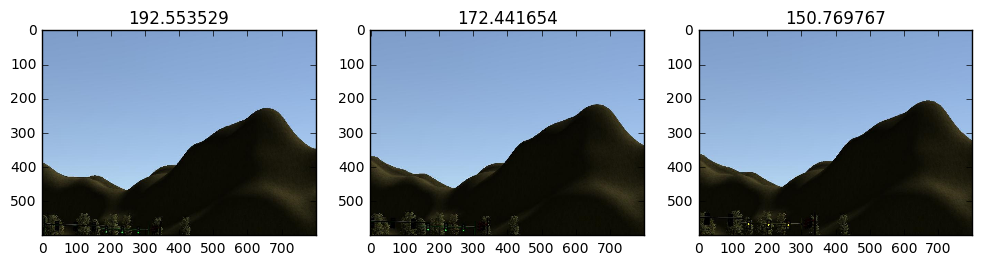

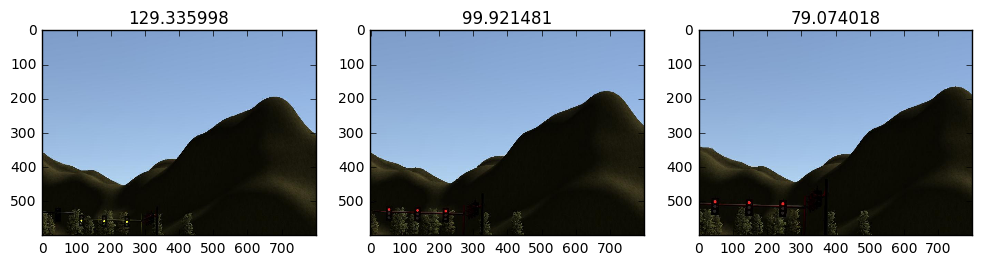

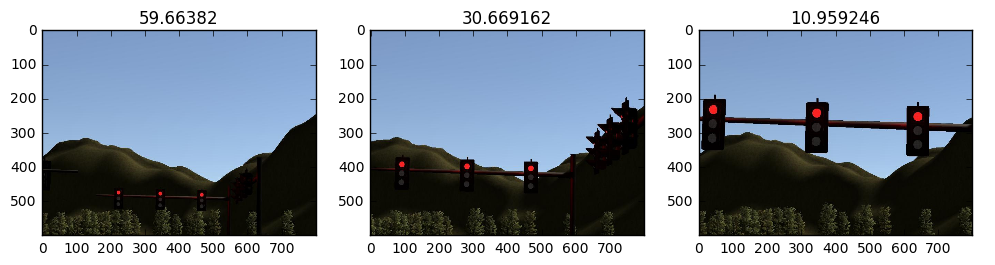

In [23]:
image0 = load_image(frame['image'][0]) 
image1 = load_image(frame['image'][1]) 
image2 = load_image(frame['image'][2]) 

images = [image0,image1,image2] 
labels = [frame['distance'][0],frame['distance'][1],frame['distance'][2]]
plt.rcParams['figure.figsize'] = (12, 6)
process.plot_images(images,labels)
plt.show()

image3 = load_image(frame['image'][3]) 
image4 = load_image(frame['image'][4]) 
image5 = load_image(frame['image'][5]) 

images = [image3,image4,image5] 
labels = [frame['distance'][3],frame['distance'][4],frame['distance'][5]]
plt.rcParams['figure.figsize'] = (12, 6)
process.plot_images(images,labels)
plt.show()

image6 = load_image(frame['image'][6]) 
image7 = load_image(frame['image'][7]) 
image8 = load_image(frame['image'][8]) 

images = [image6,image7,image8] 
labels = [frame['distance'][6],frame['distance'][7],frame['distance'][8]]
plt.rcParams['figure.figsize'] = (12, 6)
process.plot_images(images,labels)
plt.show()